<a href="https://colab.research.google.com/github/Dhruv1603/CNN_VS_ANN/blob/main/CNN_VS_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required Lib

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models


In [2]:
# Import Dataset

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 18s 0us/step


In [3]:
# Normalize the image

train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Defining class name

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


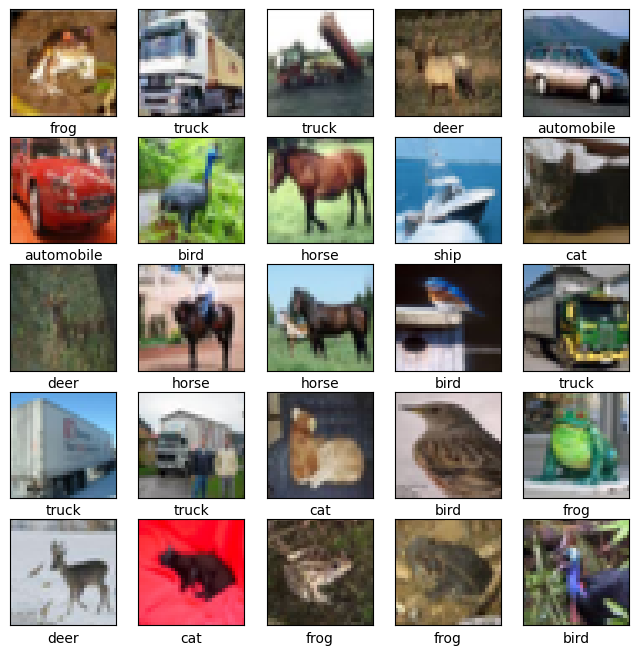

In [5]:
# Ploting few images from dataset

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## CNN

In [6]:
# Define CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 25s 9ms/step - loss: 1.6601 - accuracy: 0.4430 - val_loss: 1.1941 - val_accuracy: 0.5803
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1398 - accuracy: 0.5978 - val_loss: 1.1248 - val_accuracy: 0.6213
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9599 - accuracy: 0.6641 - val_loss: 1.0133 - val_accuracy: 0.6443
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8671 - accuracy: 0.6977 - val_loss: 0.8262 - val_accuracy: 0.7069
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7928 - accuracy: 0.7238 - val_loss: 0.8077 - val_accuracy: 0.7136
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7436 - accuracy: 0.7405 - val_loss: 0.7005 - val_accuracy: 0.7566
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7053 - accuracy: 0.7550 - val_loss: 0.6132 - val_accuracy: 0.7

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.5170 - accuracy: 0.8291 - 1s/epoch - 4ms/step

Test accuracy: 0.8291000127792358


313/313 [==============================] - 1s 2ms/step


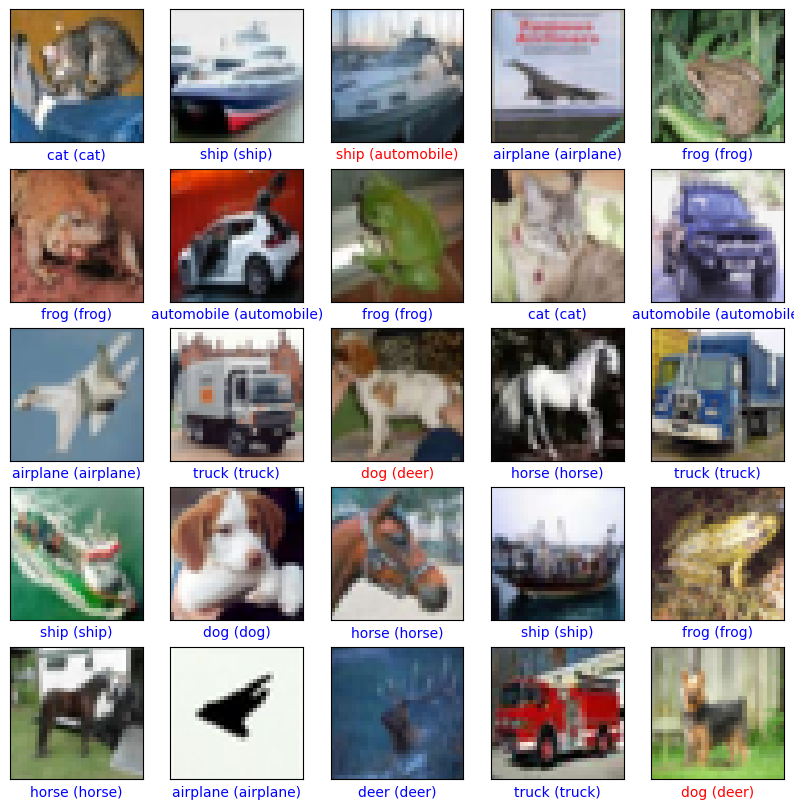

In [10]:
predictions = model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel(f"{class_names[true_label]} ({class_names[predicted_label]})", color=color)
plt.show()

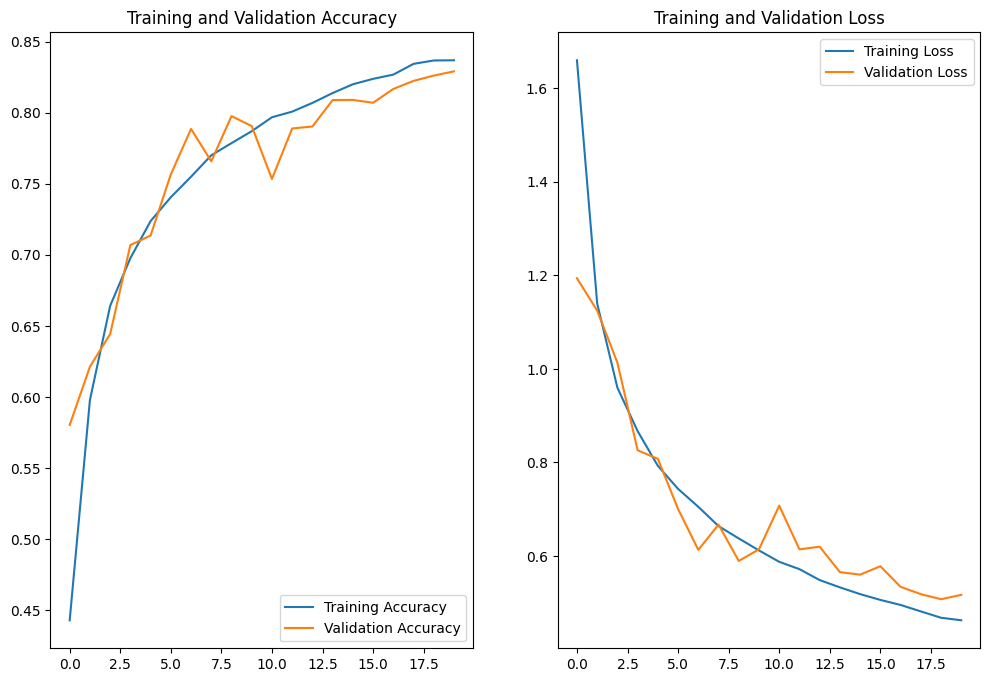

In [22]:
# Plot accuracy and loss of ANN

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## ANN

In [13]:
# Define ANN Model

ann_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [14]:
# Compile the ANN model

ann_model.compile(optimizer='Adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [15]:
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                98336     
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 512)               66048     
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 179946 (702.91 KB)
Trainable params: 179

In [16]:
ann_history = ann_model.fit(train_images, train_labels, epochs=20,
                            validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9142 - accuracy: 0.2949 - val_loss: 1.8485 - val_accuracy: 0.3339
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8032 - accuracy: 0.3420 - val_loss: 1.7451 - val_accuracy: 0.3653
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7708 - accuracy: 0.3585 - val_loss: 1.8012 - val_accuracy: 0.3400
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7528 - accuracy: 0.3623 - val_loss: 1.7268 - val_accuracy: 0.3675
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7418 - accuracy: 0.3691 - val_loss: 1.7534 - val_accuracy: 0.3656
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7361 - accuracy: 0.3720 - val_loss: 1.7128 - val_accuracy: 0.3745
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7236 - accuracy: 0.3739 - val_loss: 1.7302 - val_accuracy

In [17]:
# Test the model

ann_test_loss, ann_test_acc = ann_model.evaluate(test_images, test_labels, verbose=2)
print(f'\nANN Test accuracy: {ann_test_acc}')

313/313 - 1s - loss: 1.6957 - accuracy: 0.3859 - 608ms/epoch - 2ms/step

ANN Test accuracy: 0.38589999079704285


313/313 [==============================] - 1s 2ms/step


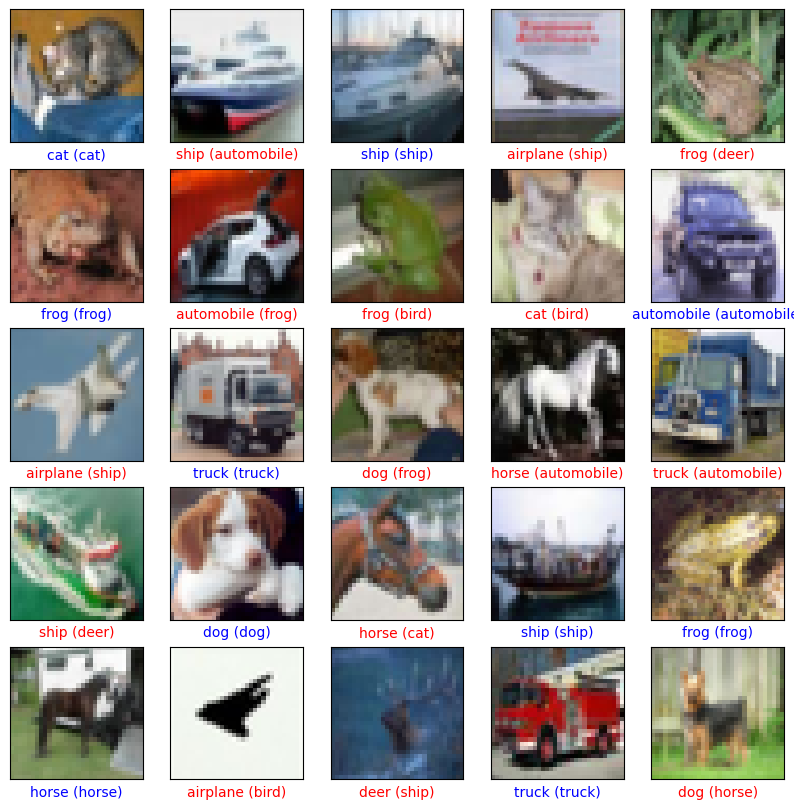

In [18]:
ann_predictions = ann_model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(ann_predictions[i])
    true_label = test_labels[i][0]
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel(f"{class_names[true_label]} ({class_names[predicted_label]})", color=color)
plt.show()

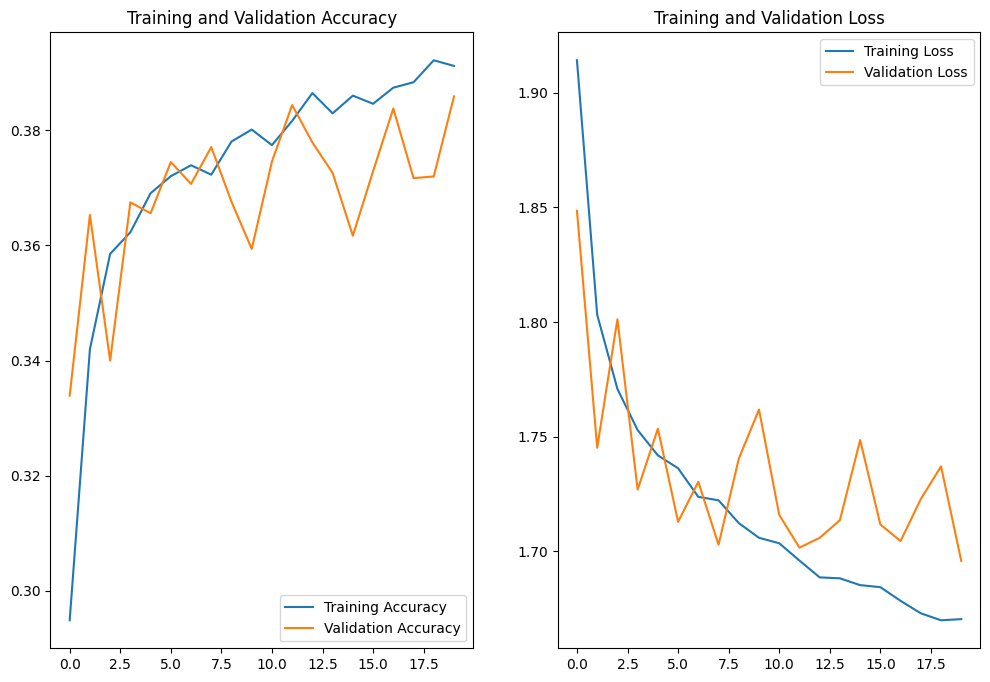

In [19]:
# Plot accuracy and loss of ANN

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Compare both Model

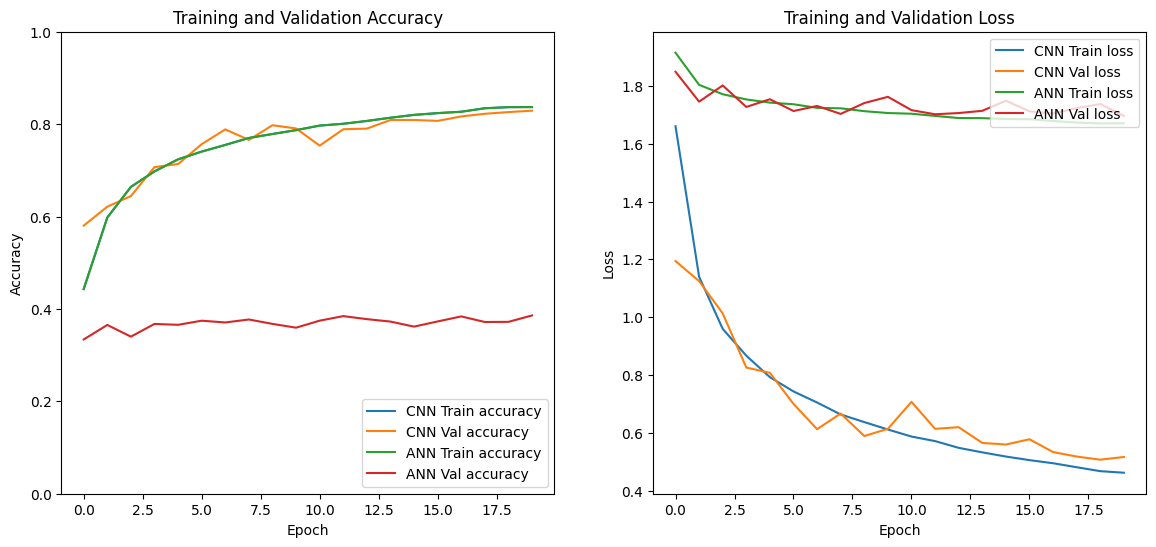

In [20]:
# Compare with graph

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='CNN Train accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Val accuracy')
plt.plot(history.history['accuracy'], label='ANN Train accuracy')
plt.plot(ann_history.history['val_accuracy'], label='ANN Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='CNN Train loss')
plt.plot(history.history['val_loss'], label='CNN Val loss')
plt.plot(ann_history.history['loss'], label='ANN Train loss')
plt.plot(ann_history.history['val_loss'], label='ANN Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()